          X         Y  class
0  0.060497  0.346551      1
1  0.590709 -0.278029      1
2  0.017667  0.018197      1
3  0.737173  0.563561      0
4 -0.274917 -0.126114      1


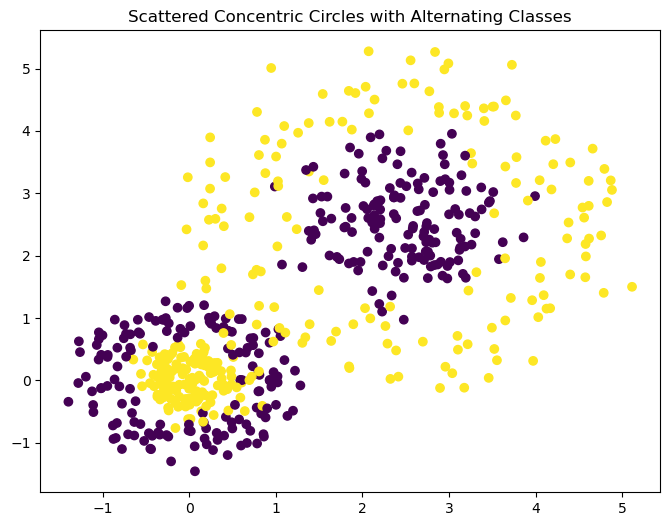

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate concentric circles with more noise for scattered points
X1, y1 = make_circles(n_samples=300, factor=0.3, noise=0.2, random_state=42)

# Generate a second set with scaling and shifting
X2, y2 = make_circles(n_samples=300, factor=0.3, noise=0.2, random_state=24)
X2 = X2 * 2 + [2.5, 2.5]  # Scale and shift the second set to create larger circles

# Flip the classes in the second set to alternate the class distribution
y2 = 1 - y2

# Combine both datasets
X_combined = np.vstack((X1, X2))
y_combined = np.hstack((y1, y2))

# Convert to DataFrame for consistency
df = pd.DataFrame(X_combined, columns=['X', 'Y'])
df['class'] = y_combined

# Display the first few rows
print(df.head())

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=df['class'])
plt.title('Scattered Concentric Circles with Alternating Classes')
plt.show()


In [15]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [24]:
model1 = Sequential()

model1.add(Dense(2,activation='relu',input_dim=2))
model1.add(Dense(2,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
history1 = model1.fit(X,y,epochs=500,validation_split=0.2)

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4947 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4649 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5291 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5399 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4996 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5178 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5136 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5327 - loss: 0.6931 - val_accuracy: 0.

In [28]:
model2 = Sequential()

model2.add(Dense(3,activation='relu',input_dim=2))
model2.add(BatchNormalization())
model2.add(Dense(2,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [29]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
history2 = model2.fit(X,y,epochs=500,validation_split=0.2)

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4514 - loss: 0.7265 - val_accuracy: 0.5750 - val_loss: 0.6908
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4414 - loss: 0.7167 - val_accuracy: 0.5833 - val_loss: 0.6904
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4862 - loss: 0.7128 - val_accuracy: 0.5833 - val_loss: 0.6899
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4618 - loss: 0.7095 - val_accuracy: 0.5833 - val_loss: 0.6893
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4683 - loss: 0.7055 - val_accuracy: 0.5833 - val_loss: 0.6886
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5310 - loss: 0.6998 - val_accuracy: 0.5833 - val_loss: 0.6875
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5475 - loss: 0.6976 - val_accuracy: 0.5833 - val_loss: 0.6863
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5778 - loss: 0.6934 - val_accuracy: 0.

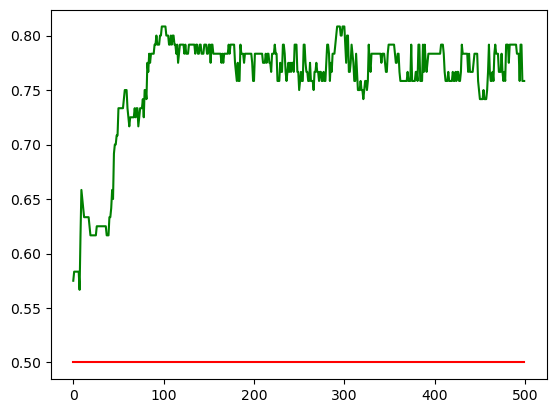

In [31]:
plt.plot(history1.history['val_accuracy'],color='red')
plt.plot(history2.history['val_accuracy'],color='green')

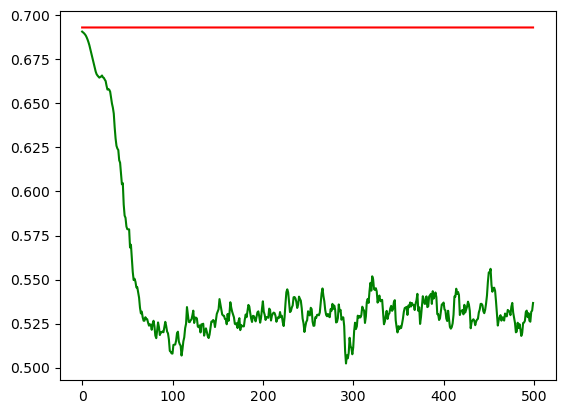

In [32]:
plt.plot(history1.history['val_loss'],color='red')
plt.plot(history2.history['val_loss'],color='green')

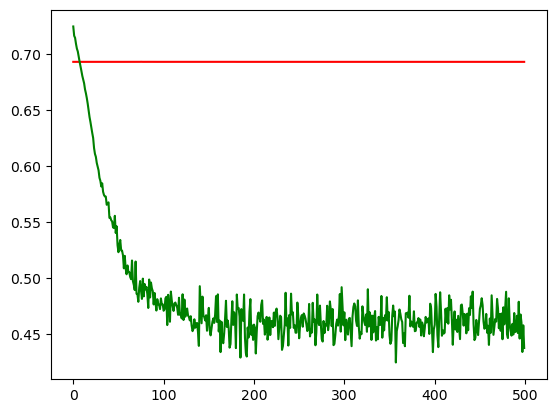

In [33]:
plt.plot(history1.history['loss'],color='red')
plt.plot(history2.history['loss'],color='green')

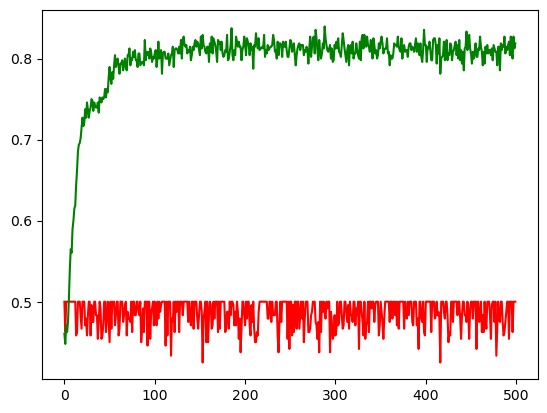

In [34]:
plt.plot(history1.history['accuracy'],color='red')
plt.plot(history2.history['accuracy'],color='green')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

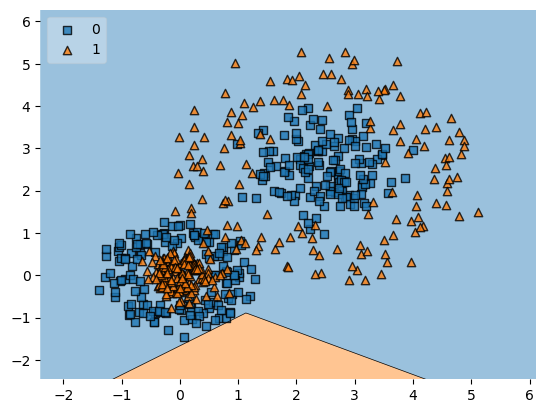

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

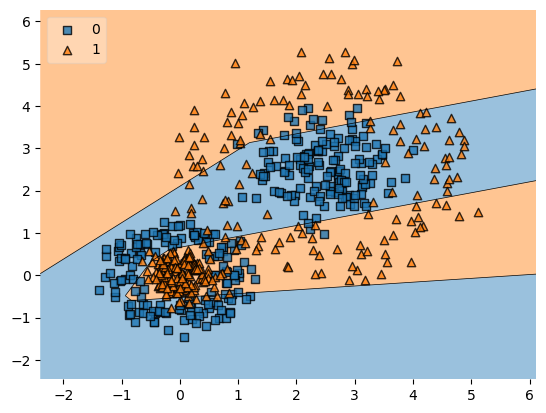

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)